CMDPについて
---

---

今回はこちらの[サイト](http://readingsml.blogspot.com/2020/03/constrained-mdps-and-reward-hypothesis.html)に書いてある説明をしていきます。

このサイトではMDPとCMDPの関係性について述べてることを目的としています。

今回はCMDPを中心に説明します。

見方を変えると、MDPは制約なしのCMDPとしてみなすことができます。


CMDPのゴールを以下に示します。

$\theta_i$は制約の閾値、$r_i(i \leq 1)$は制約に関するコスト、$r_0$は報酬です。

$$
\max _\pi V^\pi\left(r_0, \mu\right) \quad \text { s.t. } \quad V^\pi\left(r_i, \mu\right) \geq \theta_i, i=1, \ldots, n \text {. }
$$

これは$n=0$なら解けることは明らかで、MDPの興味深いのは最適な軌道の履歴が不必要ということです。



---

Main Result
---

ここでMDPとは違うCMDPについてのいくつの定理を主張します。

1.均一に最適な決定的なポリシーが存在しない可能性があり、最適なポリシーを確率的にする必要がある場合がある。

2.CMDPでは定常な方策で十分である。

3.CMDPの実現可能性(方策が制約を満たしている)を確認するのは難しい。

4.CMDPでは線形計画法で解けるが、MDPと同じ扱いはできない。

5.MDP用にデザインされた勾配法はCMPDでも機能する。

ここから説明に入るのですが、上のものは1,2,4は[こちら](https://www-sop.inria.fr/members/Eitan.Altman/TEMP/h.pdf)で3は[ここから](http://www.ams.sunysb.edu/~feinberg/public/paper3.pdf)とってきています。


---

パート1:Lack of uniformly optimal stationary policies and the need for randomization
---

次のようなMDPを考えます。

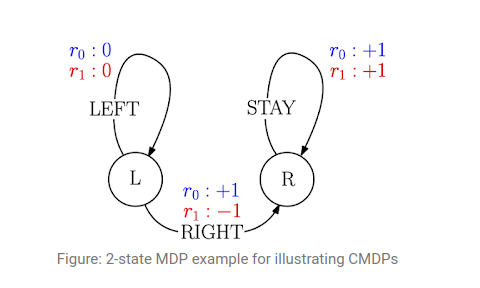

このMDPでは状態はLとRがあり、LではStayかMoveしてRに移動できる行動を選択できて、RではStayしか選べません。

遷移確率は全て決定的とします。

報酬は2種類($r_0,r_1$)あってLからRに移動するとき以外は同じものを受け取ります。

LからRに移動するときは$r_0$ではpositiveな報酬をゲットできますが、$r_1$ではnegativeな報酬を受け取ってしまい、矛盾が生じます。

この作りは典型的なCMDP問題です。

一度$r_1$を無視して考えると、optimal policy $\pi^\star$はLからRに移動することを選びますが、例えば閾値$\theta_1=0$で割引率$\gamma=0$の場合、制約をviolationしてしまって制約を考慮したとき最適な方策ではなくなってしまいます。

考え方を変えて、pをLにStayする方策と考えて、$\beta$を初期状態でLにいる確率とします。

そのようなことを考えると２つの報酬に関しての価値観数を次のようにかけます。

$$
\begin{aligned}
& V^p\left(r_0, \beta\right)=\beta(1-p)+1-\beta, \\
& V^p\left(r_1, \beta\right)=\beta(p-1)+1-\beta .
\end{aligned}
$$

制約を満たしている実現可能な方策を次のようにかけます。

$$
\beta(p-1)+1-\beta \geq 0 \quad \Leftrightarrow \quad p \geq \frac{2 \beta-1}{\beta} .
$$

このことからわかることは$\beta \geq 0.5$ではいけないことと、初期分布に依存することから初期分布に関係なく一様な定常な最適方策というものは存在しないことがわかり、確率的に考えなければいけないことがわかります。

そして$r_0$に関してわかることなのですが、決定的な方策にしても$\beta$の値によって価値が異なるので決定的な方策は良くないことがわかりますね。



---

パート2:Sufficiency of stationary policies
---

Sufficiencyの意味としては考えている方策集合に最適な方策が入っているかを指します。

まずこれらを示すためにOccupancy Measure(OM)という概念を導入します。

$$
\nu_\mu^\pi(s, a)=(1-\gamma) \sum_{t=0}^{\infty} \gamma^t \mathbb{P}_\mu^\pi\left(S_t=s, A_t=a\right)
$$

このOMを使って価値関数との関係を次に示します。

$$
\begin{aligned}
(1-\gamma) V^\pi(r, \mu) & =(1-\gamma) \sum_{t=0}^{\infty} \gamma^t \mathbb{E}_\mu^\pi\left[r\left(S_t, A_t\right)\right] \\
& =(1-\gamma) \sum_{t=0}^{\infty} \gamma^t \sum_{s, a} \mathbb{P}_\mu^\pi\left(S_t=s, A_t=a\right) r(s, a) \\
& =\left\langle\nu_\mu^\pi, r\right\rangle .
\end{aligned}
$$



ここから私達が示したいこととしては任意の方策$\pi$を考えてその方策についてのOMを定常な方策$\pi^\prime$で書くことができたら良いということになります。

つまり以下のことを示します。

$$
\nu_\mu^\pi(s, a)=\nu_\mu^{\pi^{\prime}}(s, a), \quad \forall(s, a) \in Z .
$$


定常な方策を以下に定義します。

$$
\pi^{\prime}(a \mid s)=\frac{\nu_\mu^\pi(s, a)}{\nu_\mu^\pi(s)}
$$

以下に等式を示します。

最後の式変形は上の式を使っています。

$$
\begin{aligned}
\nu_\mu^\pi(s) & =(1-\gamma) \sum_{t \geq 0} \gamma^t \mathbb{P}_\mu^\pi\left(S_t=s\right) \\
& =(1-\gamma) \mu(s)+(1-\gamma) \gamma \sum_{t \geq 0} \gamma^t \mathbb{P}_\mu^\pi\left(S_{t+1}=s\right) \\
& =(1-\gamma) \mu(s)+\gamma \sum_{s^{\prime}, a}\left\{(1-\gamma) \sum_{t \geq 0} \gamma^t \mathbb{P}_\mu^\pi\left(S_t=s^{\prime}, A_t=a\right)\right\} P_{s^{\prime}, a}(s) \\
& =(1-\gamma) \mu(s)+\gamma \sum_{s^{\prime}, a} \nu_\mu^\pi\left(s^{\prime}, a\right) P_{s^{\prime}, a}(s) \\
& =(1-\gamma) \mu(s)+\gamma \sum_{s^{\prime}} \nu_\mu^\pi\left(s^{\prime}\right) P_{s^{\prime}}^{\pi^{\prime}}(s) .
\end{aligned}
$$

$$
\begin{aligned}
&\nu_\mu^\pi=(1-\gamma) \mu+\gamma \nu_\mu^\pi P^{\pi^{\prime}}\\
&\nu_\mu^\pi=(1-\gamma) \mu\left(I-\gamma P^{\pi^{\prime}}\right)^{-1}=\nu_\mu^{\pi^{\prime}},
\end{aligned}
$$